In [9]:
#Import Dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import hvplot.pandas

In [11]:
#Load CSV and create a dataframe
f = '/Users/johnnyramirez/Project-1/Resources/cancer_dataset.csv'
cancer_df = pd.read_csv(f, encoding = "ISO-8859-1")
cancer_df.head()


,County,State,Cancer_Incidence_Count,Average_Deaths_per_Year,Median_Income,Population_Estimate_2015,Poverty_Rate,Percent_of_Population_Married,Percent_Employed_Over_16,Percent_Unemployed_Over_16,Median_Age,Median_Age_Male,Median_Age_Female,Public_Insurance_%,Private_Insurance_%,Pop_Percent_White,Pop_Percent_Black,Pop_Percent_Asian,Pop_Percent_Other_Race
0,Kitsap County,Washington,1397.0,469,61898,260131,11.2,52.5,51.9,8.0,39.3,36.9,41.7,32.9,75.1,81.780529,2.594728,4.821857,1.843479
1,Kittitas County,Washington,173.0,70,48127,43269,18.6,44.5,55.9,7.8,33.0,32.2,33.7,31.1,70.2,89.228509,0.969102,2.246233,3.741352
2,Klickitat County,Washington,102.0,50,49348,21026,14.6,54.2,45.9,7.0,45.0,44.0,45.8,42.1,63.7,90.922190,0.739673,0.465898,2.747358
3,Lewis County,Washington,427.0,202,44243,75882,17.1,52.7,48.3,12.1,42.8,42.2,43.4,45.3,58.4,91.744686,0.782626,1.161359,1.362643
4,Lincoln County,Washington,57.0,26,49955,10321,12.5,57.8,48.2,4.8,48.3,47.8,48.9,44.0,61.6,94.104024,0.270192,0.665830,0.492135


In [27]:
#Create a new dataframe with the columns avgDeathsPerYear per state
DPS_df= cancer_df.loc[:,["Median_Income" , "Average_Deaths_per_Year","State"]]


In [42]:
unique_values = DPS_df['State'].unique()

new_df = pd.DataFrame({'State': unique_values})
new_df.head()


,State
0,Washington
1,West Virginia
2,Wisconsin
3,Nebraska
4,Nevada


In [26]:
#Create a new dataframe that shows the totals by state for Median Income and Average Deaths per year.
grouped_df = DPS_df.groupby('State').agg({'Median_Income': 'mean' , 'Average_Deaths_per_Year': 'sum'})
grouped_df

,Median_Income,Average_Deaths_per_Year
State,,
Alabama,38871.126984,9984
Alaska,63487.777778,881
Arizona,43057.533333,10814
Arkansas,37577.946667,6545
California,56102.912281,56853
Colorado,52769.083333,7134
Connecticut,70415.375000,6783
Delaware,57406.333333,1894
District of Columbia,69992.000000,1084


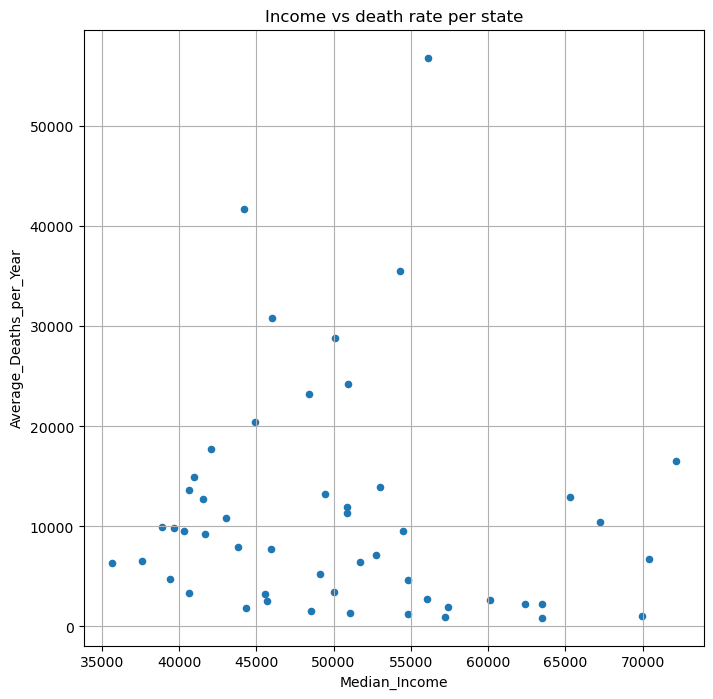

In [22]:
#Create a scatter plot showing the median income and average deaths per year in each state.
grouped_df.plot(kind="scatter", x="Median_Income", y="Average_Deaths_per_Year", grid=True, figsize=(8,8),
              title="Income vs death rate per state")
plt.show()

In [51]:
#Create a new dataframe with the columns Median age and poverty rate per state
PM_df= cancer_df.loc[:,["Median_Age" , "Poverty_Rate","State"]]

Poverty_vs_MAge_df = PM_df.groupby('State').agg({'Poverty_Rate': 'mean' , 'Median_Age': 'mean'})

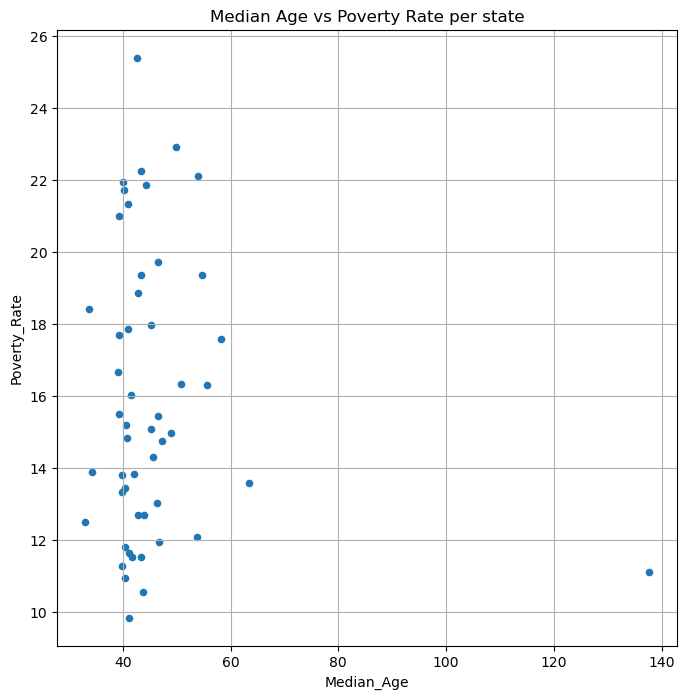

In [49]:
Poverty_vs_MAge_df.plot(kind="scatter", x="Median_Age", y="Poverty_Rate", grid=True, figsize=(8,8),
              title="Median Age vs Poverty Rate per state")
plt.show()